In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

!pip install wordcloud
!pip install squarify

entrenamiento = pd.read_csv('train.csv')
testeo = pd.read_csv('test.csv')
muestra = pd.read_csv('sample_submission.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
entrenamiento

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
testeo

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
muestra

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


## 1) Barplot

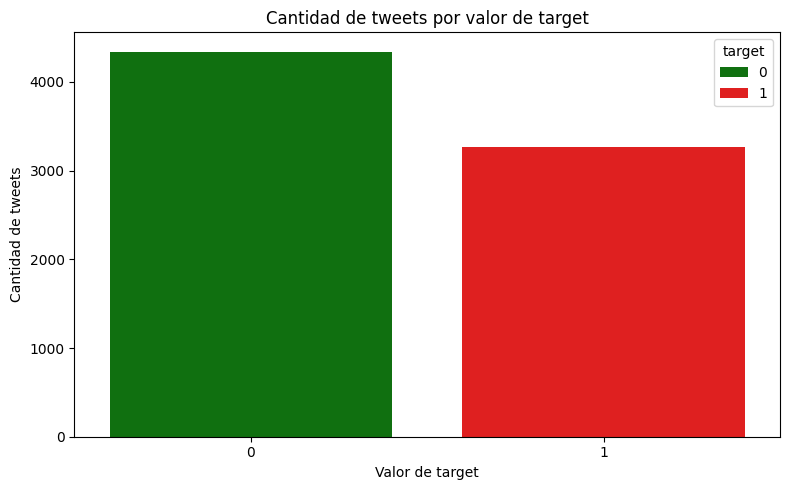

In [12]:
cantidad_tweets_por_target = entrenamiento.groupby('target').size().reset_index(name='cantidad_tweets')

plt.figure(figsize=(8, 5))
sns.barplot(data=cantidad_tweets_por_target, x='target', y='cantidad_tweets', hue='target', palette={0: "green", 1: "red"}, legend=True)
plt.title("Cantidad de tweets por valor de target")
plt.xlabel("Valor de target")
plt.ylabel("Cantidad de tweets")
plt.tight_layout()
plt.show()

## 2) Histograma

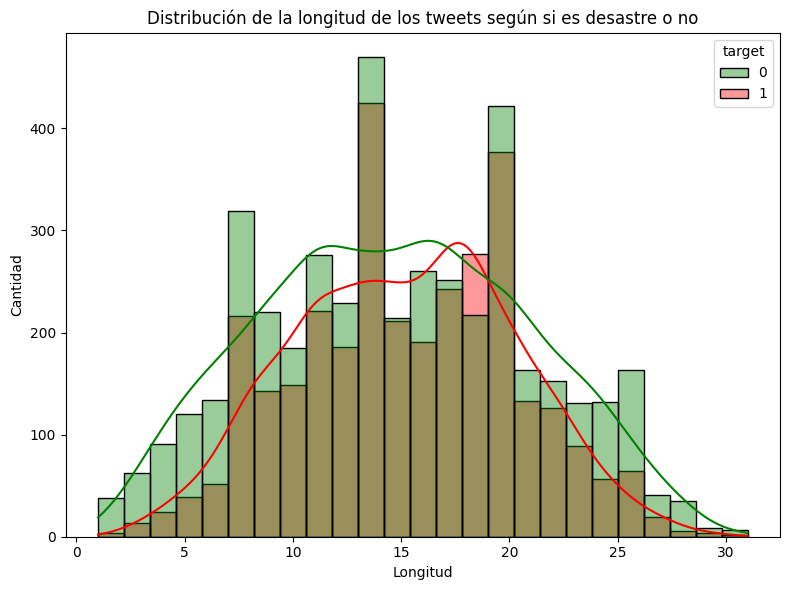

In [14]:
entrenamiento['longitud de tweet'] = entrenamiento['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.histplot(data=entrenamiento, x='longitud de tweet', hue='target', bins=25, kde=True, palette={0: "green", 1: "red"}, legend=True, alpha=0.4)
plt.title('Distribución de la longitud de los tweets según si es desastre o no')
plt.xlabel('Longitud')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

## 3) Wordcloud

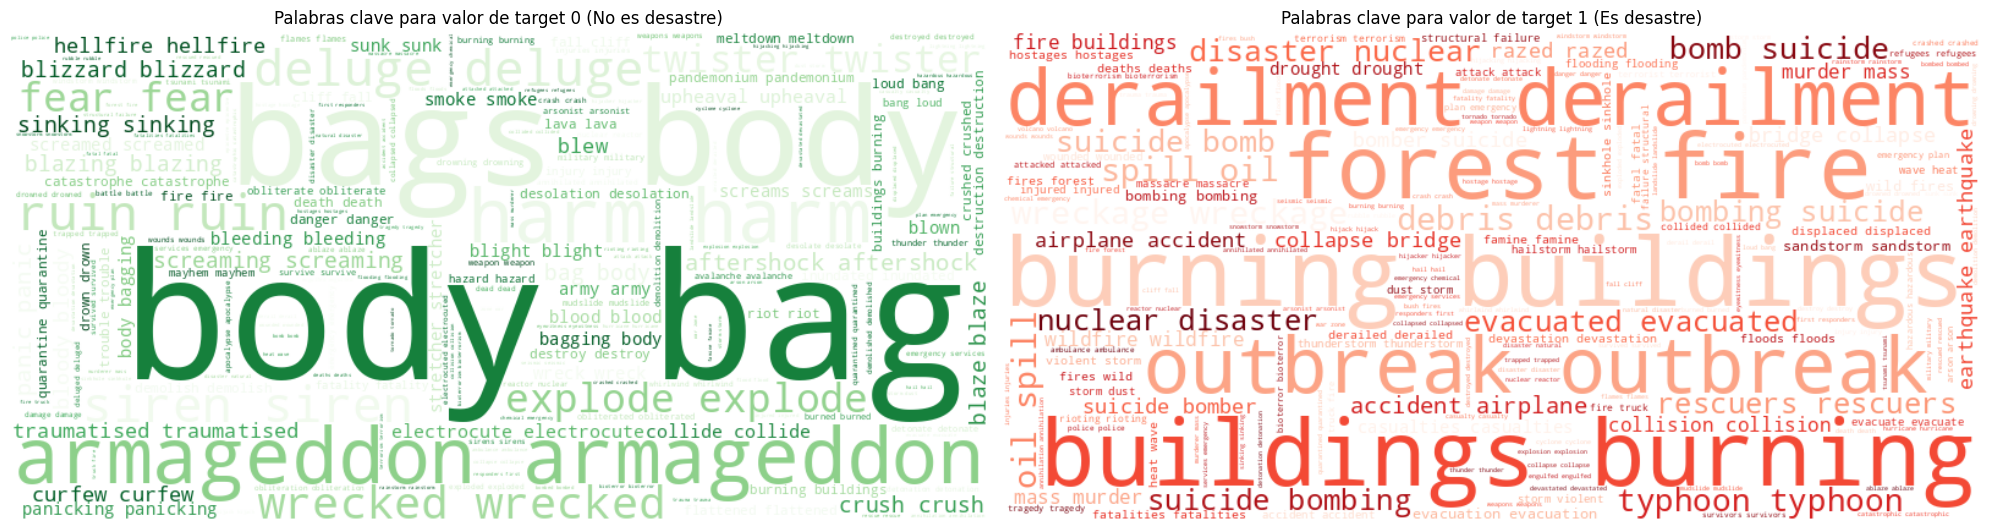

In [27]:
from wordcloud import WordCloud

entrenamiento_target_0 = entrenamiento[entrenamiento['target'] == 0].copy()
entrenamiento_target_1 = entrenamiento[entrenamiento['target'] == 1].copy()

entrenamiento_target_0['keyword'] = entrenamiento_target_0['keyword'].str.replace('%20', ' ', regex=False)
entrenamiento_target_1['keyword'] = entrenamiento_target_1['keyword'].str.replace('%20', ' ', regex=False)

entrenamiento_target_0_filtered = entrenamiento_target_0[entrenamiento_target_0['keyword'].notna()]
texto_completo_0 = ' '.join(entrenamiento_target_0_filtered['keyword'])

entrenamiento_target_1_filtered = entrenamiento_target_1[entrenamiento_target_1['keyword'].notna()]
texto_completo_1 = ' '.join(entrenamiento_target_1_filtered['keyword'])

wordcloud_0 = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(texto_completo_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(texto_completo_1)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(wordcloud_0, interpolation='bilinear')
axes[0].set_title("Palabras clave para valor de target 0 (No es desastre)")
axes[0].axis("off")

axes[1].imshow(wordcloud_1, interpolation='bilinear')
axes[1].set_title("Palabras clave para valor de target 1 (Es desastre)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## 4) Stacked Bar Plot

/tmp/ipython-input-4029517925.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conteo_ubicacion_target_top10['percentage'] = conteo_ubicacion_target_top10.groupby('location')['cantidad_tweets'].transform(lambda x: x / x.sum() * 100)


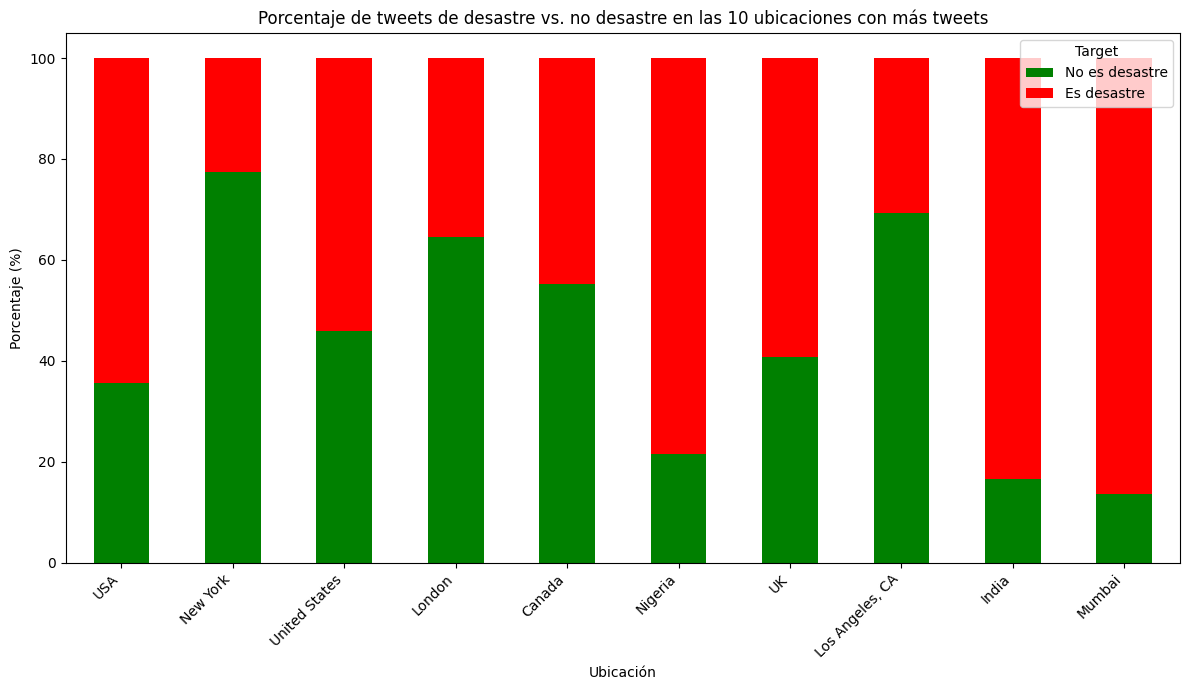

In [31]:
filtro_ubicacion_nan = entrenamiento[entrenamiento['location'].notna()]

conteo_ubicacion_target = filtro_ubicacion_nan.groupby(['location', 'target']).size().reset_index(name='cantidad_tweets')

top_10_ubicaciones = filtro_ubicacion_nan['location'].value_counts().head(10).index.tolist()

conteo_ubicacion_target_top10 = conteo_ubicacion_target[conteo_ubicacion_target['location'].isin(top_10_ubicaciones)]

conteo_ubicacion_target_top10['percentage'] = conteo_ubicacion_target_top10.groupby('location')['cantidad_tweets'].transform(lambda x: x / x.sum() * 100)

pivot_ubicacion_target = conteo_ubicacion_target_top10.pivot(index='location', columns='target', values='percentage').fillna(0)

pivot_ubicacion_target = pivot_ubicacion_target.loc[top_10_ubicaciones]

pivot_ubicacion_target.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 7))

plt.title("Porcentaje de tweets de desastre vs. no desastre en las 10 ubicaciones con más tweets")
plt.xlabel("Ubicación")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Target", labels=["No es desastre", "Es desastre"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5) Treemap

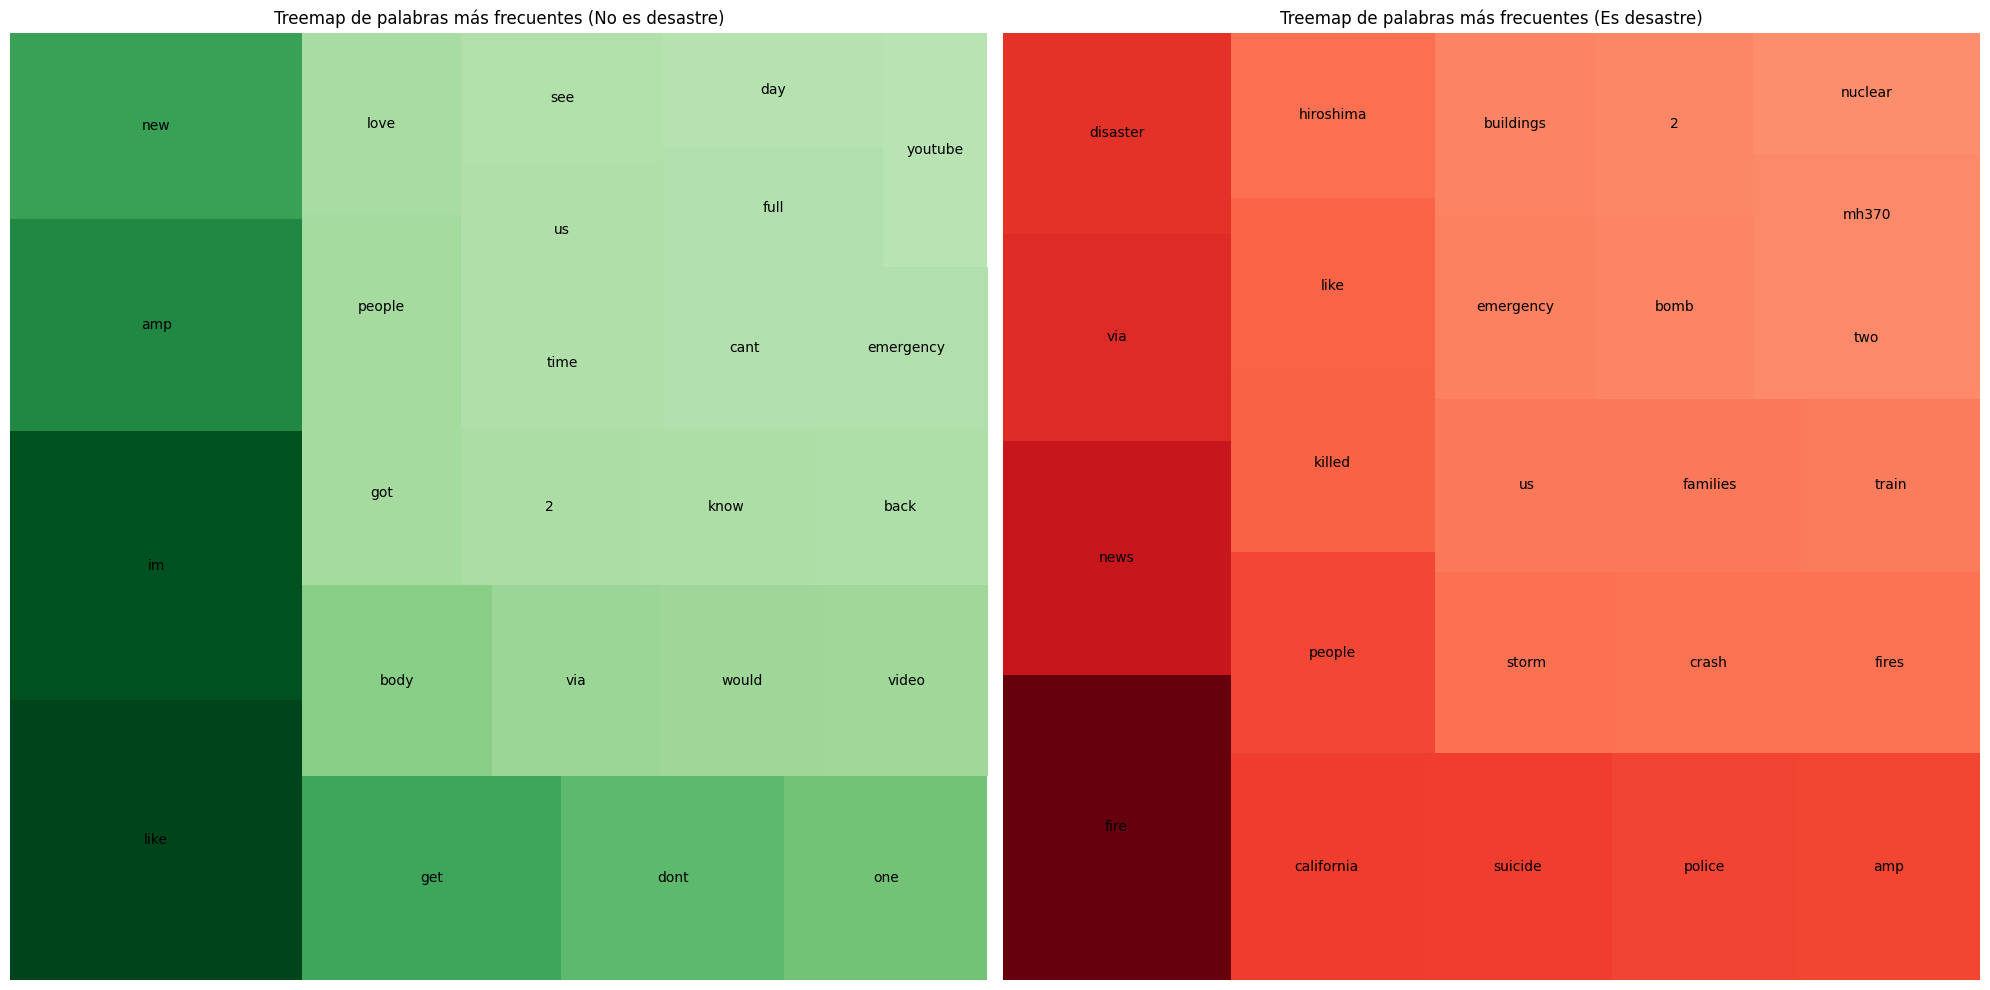

In [44]:
from collections import Counter
import squarify

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [word for word in tokens if word not in stopwords]
    return tokens

entrenamiento['processed_text'] = entrenamiento['text'].apply(preprocess_text)

entrenamiento_target_0 = entrenamiento[entrenamiento['target'] == 0].copy()
entrenamiento_target_1 = entrenamiento[entrenamiento['target'] == 1].copy()

word_frequencies_target_0 = Counter()
for tokens in entrenamiento_target_0['processed_text']:
    word_frequencies_target_0.update(tokens)

word_frequencies_target_1 = Counter()
for tokens in entrenamiento_target_1['processed_text']:
    word_frequencies_target_1.update(tokens)

N = 25

df_word_frequencies_0 = pd.DataFrame(word_frequencies_target_0.most_common(N), columns=['word', 'count'])
df_word_frequencies_1 = pd.DataFrame(word_frequencies_target_1.most_common(N), columns=['word', 'count'])

df_top_words_0 = df_word_frequencies_0.sort_values(by='count', ascending=False)
df_top_words_1 = df_word_frequencies_1.sort_values(by='count', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

squarify.plot(sizes=df_top_words_0['count'], label=df_top_words_0['word'], ax=axes[0], color=plt.cm.Greens(df_top_words_0['count']/max(df_top_words_0['count'])))
axes[0].set_title("Treemap de palabras más frecuentes (No es desastre)")
axes[0].axis("off")

squarify.plot(sizes=df_top_words_1['count'], label=df_top_words_1['word'], ax=axes[1], color=plt.cm.Reds(df_top_words_1['count']/max(df_top_words_1['count'])))
axes[1].set_title("Treemap de palabras más frecuentes (Es desastre)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## 6) Violinplot

/tmp/ipython-input-1815805333.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=entrenamiento, x='target', y='sentiment_score', palette={'0': "green", '1': "red"})


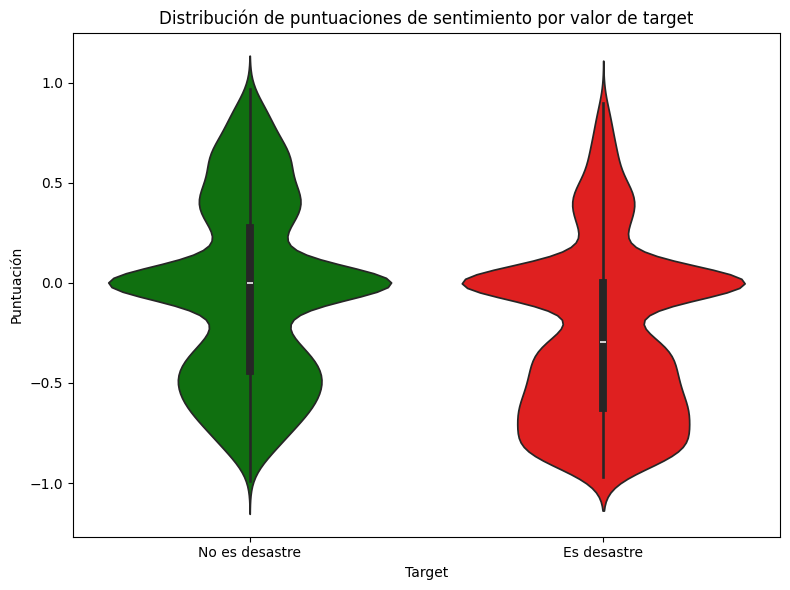

In [51]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text_tokens):
    if not text_tokens:
        return 0.0
    return analyzer.polarity_scores(" ".join(text_tokens))['compound']

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [word for word in tokens if word not in stopwords]
    return tokens

entrenamiento['processed_text'] = entrenamiento['text'].apply(preprocess_text)

entrenamiento['sentiment_score'] = entrenamiento['processed_text'].apply(get_sentiment_score)

plt.figure(figsize=(8, 6))
sns.violinplot(data=entrenamiento, x='target', y='sentiment_score', palette={'0': "green", '1': "red"})
plt.title('Distribución de puntuaciones de sentimiento por valor de target')
plt.xlabel('Target')
plt.ylabel('Puntuación')
plt.xticks([0, 1], ['No es desastre', 'Es desastre'])
plt.tight_layout()
plt.show()